<a href="https://colab.research.google.com/github/UsfHajaj/Deep-Learning-Project/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import time
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [17]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()

In [18]:
EPOCHS = 10
BATCH_SIZE = 128
noise_dim = 100
num_examples_to_generate = 16


In [19]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_train=(X_train-127.5)/127.5


In [20]:
dataset = tf.data.Dataset.from_tensor_slices(X_train)
dataset = dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

In [21]:
def make_generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [22]:
def make_discriminator_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [23]:
generator = make_generator_model()
discriminator = make_discriminator_model()

In [24]:
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [25]:
generator_optimizer = keras.optimizers.Adam(1e-4)
discriminator_optimizer = keras.optimizers.Adam(1e-4)


In [26]:
def train_step(images):
    # Generating noise from a normal distribution
    fake_img_noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(fake_img_noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
        print("gen_loss" , np.mean(gen_loss))
        print("disc_loss" , np.mean(disc_loss))
        #print("gen_loss" , gen_loss)

In [27]:
from tqdm import tqdm
def train(dataset, epochs):
    for epoch in tqdm(range(epochs)):
        for batch in dataset:
            train_step(batch)

In [28]:
train(dataset, EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]

gen_loss tf.Tensor(0.70271516, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3958173, shape=(), dtype=float32)
gen_loss tf.Tensor(0.67600906, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3532923, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6601436, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3125913, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6446809, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2683058, shape=(), dtype=float32)
gen_loss tf.Tensor(0.62873685, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2394333, shape=(), dtype=float32)
gen_loss tf.Tensor(0.613711, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2062604, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6026385, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1809795, shape=(), dtype=float32)
gen_loss tf.Tensor(0.5904618, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1644971, shape=(), dtype=float32)
gen_loss tf.Tensor(0.57888937, shape=(), dtype=float32)
disc_loss tf.Tensor(1.149737, shape=(), dtype=float32)

 10%|█         | 1/10 [01:22<12:18, 82.04s/it]

gen_loss tf.Tensor(1.3739197, shape=(), dtype=float32)
disc_loss tf.Tensor(0.6545503, shape=(), dtype=float32)
gen_loss tf.Tensor(1.3948352, shape=(), dtype=float32)
disc_loss tf.Tensor(0.64781916, shape=(), dtype=float32)
gen_loss tf.Tensor(1.3547215, shape=(), dtype=float32)
disc_loss tf.Tensor(0.6303289, shape=(), dtype=float32)
gen_loss tf.Tensor(1.3858567, shape=(), dtype=float32)
disc_loss tf.Tensor(0.62673646, shape=(), dtype=float32)
gen_loss tf.Tensor(1.396907, shape=(), dtype=float32)
disc_loss tf.Tensor(0.6494144, shape=(), dtype=float32)
gen_loss tf.Tensor(1.4325933, shape=(), dtype=float32)
disc_loss tf.Tensor(0.5893508, shape=(), dtype=float32)
gen_loss tf.Tensor(1.4490957, shape=(), dtype=float32)
disc_loss tf.Tensor(0.5951548, shape=(), dtype=float32)
gen_loss tf.Tensor(1.472779, shape=(), dtype=float32)
disc_loss tf.Tensor(0.6247656, shape=(), dtype=float32)
gen_loss tf.Tensor(1.4798524, shape=(), dtype=float32)
disc_loss tf.Tensor(0.59222186, shape=(), dtype=float32)


 20%|██        | 2/10 [02:09<08:14, 61.83s/it]

gen_loss tf.Tensor(1.0736952, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9545152, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0660251, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9950751, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0763147, shape=(), dtype=float32)
disc_loss tf.Tensor(0.991712, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0901191, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9998157, shape=(), dtype=float32)
gen_loss tf.Tensor(0.97016704, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0025101, shape=(), dtype=float32)
gen_loss tf.Tensor(1.011663, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0398688, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9337254, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0543308, shape=(), dtype=float32)
gen_loss tf.Tensor(0.94840777, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1062362, shape=(), dtype=float32)
gen_loss tf.Tensor(0.95579773, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0445945, shape=(), dtype=float32)


 30%|███       | 3/10 [02:57<06:28, 55.46s/it]

gen_loss tf.Tensor(0.71239007, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6589131, shape=(), dtype=float32)
gen_loss tf.Tensor(0.7787381, shape=(), dtype=float32)
disc_loss tf.Tensor(1.583003, shape=(), dtype=float32)
gen_loss tf.Tensor(0.7628547, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6664784, shape=(), dtype=float32)
gen_loss tf.Tensor(0.7995739, shape=(), dtype=float32)
disc_loss tf.Tensor(1.5815408, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6973776, shape=(), dtype=float32)
disc_loss tf.Tensor(1.706586, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6711813, shape=(), dtype=float32)
disc_loss tf.Tensor(1.7264702, shape=(), dtype=float32)
gen_loss tf.Tensor(0.63789666, shape=(), dtype=float32)
disc_loss tf.Tensor(1.707793, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6579234, shape=(), dtype=float32)
disc_loss tf.Tensor(1.7305603, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6709027, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6607239, shape=(), dtype=float32)
ge

 40%|████      | 4/10 [03:44<05:13, 52.26s/it]

gen_loss tf.Tensor(0.96979946, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1879221, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9847343, shape=(), dtype=float32)
disc_loss tf.Tensor(1.216913, shape=(), dtype=float32)
gen_loss tf.Tensor(0.97838163, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2261174, shape=(), dtype=float32)
gen_loss tf.Tensor(0.943362, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2052991, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9213661, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2673246, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9120456, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2747666, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8672917, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2652259, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8886796, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2669377, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8725881, shape=(), dtype=float32)
disc_loss tf.Tensor(1.245725, shape=(), dtype=float32)
ge

 50%|█████     | 5/10 [04:32<04:12, 50.43s/it]

gen_loss tf.Tensor(0.7402157, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3241863, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8093908, shape=(), dtype=float32)
disc_loss tf.Tensor(1.304933, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8049152, shape=(), dtype=float32)
disc_loss tf.Tensor(1.354073, shape=(), dtype=float32)
gen_loss tf.Tensor(0.86314577, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3523151, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8569045, shape=(), dtype=float32)
disc_loss tf.Tensor(1.438135, shape=(), dtype=float32)
gen_loss tf.Tensor(0.80968547, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3649193, shape=(), dtype=float32)
gen_loss tf.Tensor(0.7446207, shape=(), dtype=float32)
disc_loss tf.Tensor(1.4633074, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6807214, shape=(), dtype=float32)
disc_loss tf.Tensor(1.4635848, shape=(), dtype=float32)
gen_loss tf.Tensor(0.704252, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3679588, shape=(), dtype=float32)
gen

 60%|██████    | 6/10 [05:19<03:16, 49.22s/it]

gen_loss tf.Tensor(1.1884103, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9501445, shape=(), dtype=float32)
gen_loss tf.Tensor(1.2683458, shape=(), dtype=float32)
disc_loss tf.Tensor(0.91592985, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1853997, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0440507, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1431429, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0913203, shape=(), dtype=float32)
gen_loss tf.Tensor(1.094543, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1017141, shape=(), dtype=float32)
gen_loss tf.Tensor(0.92254597, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0697465, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8558398, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1119115, shape=(), dtype=float32)
gen_loss tf.Tensor(0.86174476, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1912386, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0118233, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1757338, shape=(), dtype=float32)

 70%|███████   | 7/10 [06:40<02:59, 59.91s/it]

gen_loss tf.Tensor(1.2175641, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9114545, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1964325, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9395915, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1957443, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9593369, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1609721, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9557735, shape=(), dtype=float32)
gen_loss tf.Tensor(1.116523, shape=(), dtype=float32)
disc_loss tf.Tensor(0.9072603, shape=(), dtype=float32)
gen_loss tf.Tensor(1.2058156, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0133407, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1551948, shape=(), dtype=float32)
disc_loss tf.Tensor(0.930059, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1660124, shape=(), dtype=float32)
disc_loss tf.Tensor(0.95859563, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0835544, shape=(), dtype=float32)
disc_loss tf.Tensor(1.00402, shape=(), dtype=float32)
gen_

 80%|████████  | 8/10 [07:32<01:54, 57.16s/it]

gen_loss tf.Tensor(1.0723265, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2391354, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1546314, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2198914, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0976396, shape=(), dtype=float32)
disc_loss tf.Tensor(1.271584, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9650321, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2177366, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9057326, shape=(), dtype=float32)
disc_loss tf.Tensor(1.288412, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8242632, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2800285, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9888643, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3393897, shape=(), dtype=float32)
gen_loss tf.Tensor(1.0614185, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2901022, shape=(), dtype=float32)
gen_loss tf.Tensor(0.94628036, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2496656, shape=(), dtype=float32)
ge

 90%|█████████ | 9/10 [08:29<00:57, 57.12s/it]

tf.Tensor(1.4200864, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8422536, shape=(), dtype=float32)
disc_loss tf.Tensor(1.353639, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9700458, shape=(), dtype=float32)
disc_loss tf.Tensor(1.2154634, shape=(), dtype=float32)
gen_loss tf.Tensor(0.88733315, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3715241, shape=(), dtype=float32)
gen_loss tf.Tensor(0.9457214, shape=(), dtype=float32)
disc_loss tf.Tensor(1.431499, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8523166, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3300326, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8518603, shape=(), dtype=float32)
disc_loss tf.Tensor(1.4038346, shape=(), dtype=float32)
gen_loss tf.Tensor(0.7907562, shape=(), dtype=float32)
disc_loss tf.Tensor(1.4008472, shape=(), dtype=float32)
gen_loss tf.Tensor(0.8930392, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3184783, shape=(), dtype=float32)
gen_loss tf.Tensor(0.91596365, shape=(), dtype=float32)
disc_loss t

100%|██████████| 10/10 [09:18<00:00, 55.86s/it]

gen_loss tf.Tensor(1.1863835, shape=(), dtype=float32)
disc_loss tf.Tensor(1.0728676, shape=(), dtype=float32)
gen_loss tf.Tensor(1.1950202, shape=(), dtype=float32)
disc_loss tf.Tensor(1.1277417, shape=(), dtype=float32)


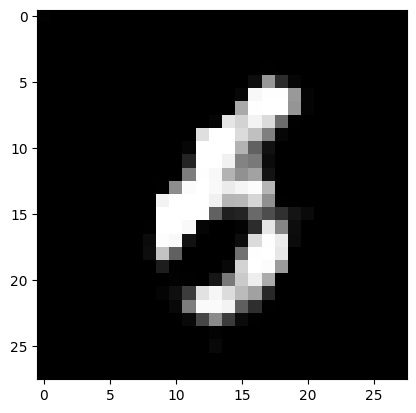

In [40]:
plt.imshow(generator(np.random.randn(1,100)).reshape(28,28),cmap='gray')

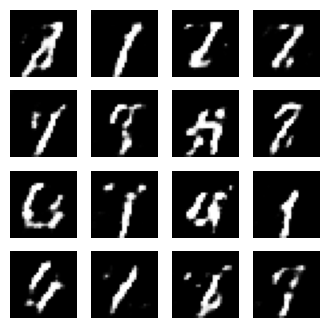

In [35]:
# Save the generator weights to a file
generator.save_weights('generator_weights.h5')

# Load the generator weights from the file
generator.load_weights('generator_weights.h5')

# Generate some fake images using the trained generator
noise = tf.random.normal([num_examples_to_generate, noise_dim])
generated_images = generator(noise, training=False)

# Plot the generated images
fig = plt.figure(figsize=(4,4))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow((generated_images[i]*0.5 + 0.5).numpy(),cmap='gray')
    plt.axis('off')
plt.show()